In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('salary.csv')

In [4]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [5]:
df.isnull()

,YearsExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


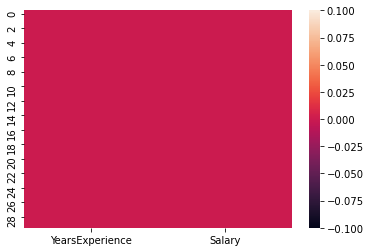

In [6]:
sns.heatmap(df.isnull())

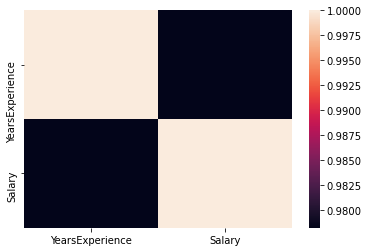

In [7]:
#Both are highly negatively corelated
dfcor=df.corr()
sns.heatmap(dfcor)

In [8]:
# no outliers and skew
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


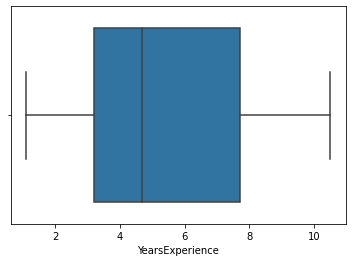

In [9]:
sns.boxplot(df['YearsExperience'])

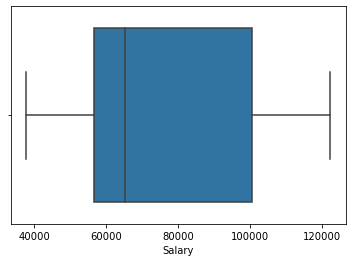

In [10]:
sns.boxplot(df['Salary'])

In [11]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]
df_new

(array([], dtype=int64), array([], dtype=int64))


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [12]:
df.shape

(30, 2)

In [13]:
#Outlier values has been removed
df_new.shape

(30, 2)

In [14]:
df.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

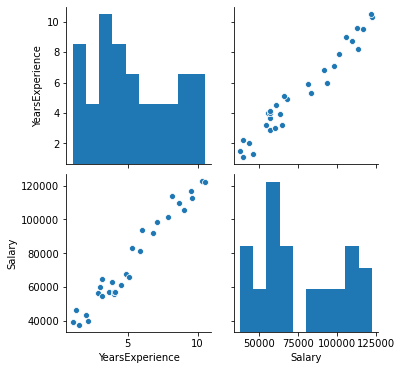

In [15]:
sns.pairplot(df)

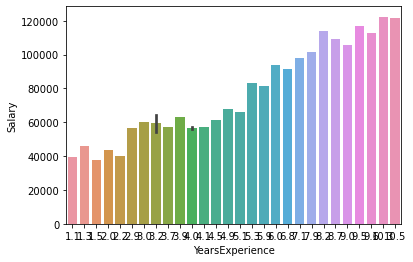

In [16]:
sns.barplot(x='YearsExperience',y='Salary',data=df)

In [28]:
x=df.iloc[ :,0]

In [29]:
x

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64

In [30]:
y=df.iloc[ :,1]

In [31]:
y

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64

In [32]:
x=pd.DataFrame(x)

In [33]:
x.shape

(30, 1)

In [34]:
y=pd.DataFrame(y)

In [35]:
y

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891
5,56642
6,60150
7,54445
8,64445
9,57189


In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [37]:
x_train.shape

(20, 1)

In [38]:
y_train.shape

(20, 1)

In [39]:
x_test.shape

(10, 1)

In [40]:
y_test.shape

(10, 1)

In [41]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [42]:
lm.coef_

array([[9426.03876907]])

In [43]:
lm.intercept_

array([25324.33537924])

In [44]:
lm.score(x_train,y_train)

0.9549236946181227

In [45]:
pred=lm.predict(x_test)

In [46]:
print("predict result",pred)

predict result [[115814.30756236]
 [ 71511.92534771]
 [102617.85328566]
 [ 75282.34085534]
 [ 55487.65944028]
 [ 60200.67882482]
 [122412.53470072]
 [107330.8726702 ]
 [ 63028.49045554]
 [ 35692.97802523]]


In [47]:
print("actual result",y_test)

actual result     Salary
27  112635
15   67938
23  113812
17   83088
8    64445
9    57189
28  122391
24  109431
12   56957
0    39343


In [53]:
#Error are very high
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean square error',mean_squared_error(y_test,pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

mean absolute error 4956.523261444907
mean square error 35301898.88713492
RMSE 5941.54011070656


In [51]:
#r2score
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.9553063138044948


In [105]:
#Cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(lm,x,y,cv=5)
print(scores)
print(scores.mean(),scores.std())

[ 0.3595933  -1.24422823  0.25052696  0.29699762  0.07028896]
-0.05336427684509719 0.6031723433172346


In [67]:
#Error is high,We use Lasso,ridge and ensemble technique

In [68]:
from sklearn.linear_model import Lasso,Ridge

In [82]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.9549236946181227

In [83]:
ls.coef_

array([9426.038755])

In [85]:
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.9549236946176496

In [86]:
rd.coef_

array([[9426.03213439]])

In [87]:
from sklearn.linear_model import ElasticNet

In [89]:
enr=ElasticNet(alpha=0.0001)
enr.fit(x_train,y_train)
enr.score(x_train,y_train)

0.9549236945708034

In [90]:
enr.coef_

array([9425.97241559])